In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [2]:
 path = '/content/drive/MyDrive/Colab_Notebooks'

In [3]:
import pandas as pd   #for data manupulation
import numpy as np #for numerical computation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [4]:
covid_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/covid_19_india.csv') #df = data frame

In [ ]:
covid_df.head(10)

In [ ]:
covid_df.info()

In [ ]:
covid_df.describe() #gives mathematical statistics about your data

In [5]:
vaccine_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/covid_vaccine_statewise.csv')

In [6]:
covid_df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace = True, axis = 1)

In [ ]:
covid_df.head()

In [7]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

In [ ]:
covid_df.head()

In [ ]:
# total no of active cases = confirmed - cured - deaths
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

covid_df.tail()

In [9]:
#pivot table using pandas

statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"],
                           index = "State/UnionTerritory", aggfunc = max)

In [10]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [11]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [12]:
statewise = statewise.sort_values(by = 'Confirmed', ascending = False)

In [ ]:
statewise.style.background_gradient(cmap = 'cubehelix') #cmap = color map

In [14]:
# top 10 active cases states
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases'], ascending = False).reset_index()

In [18]:
fig = plt.figure(figsize = (16,9))

<Figure size 1600x900 with 0 Axes>

In [ ]:
plt.title('Top 10 states with most active cases in India', size = 25)

In [ ]:
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 2, edgecolor = 'red')

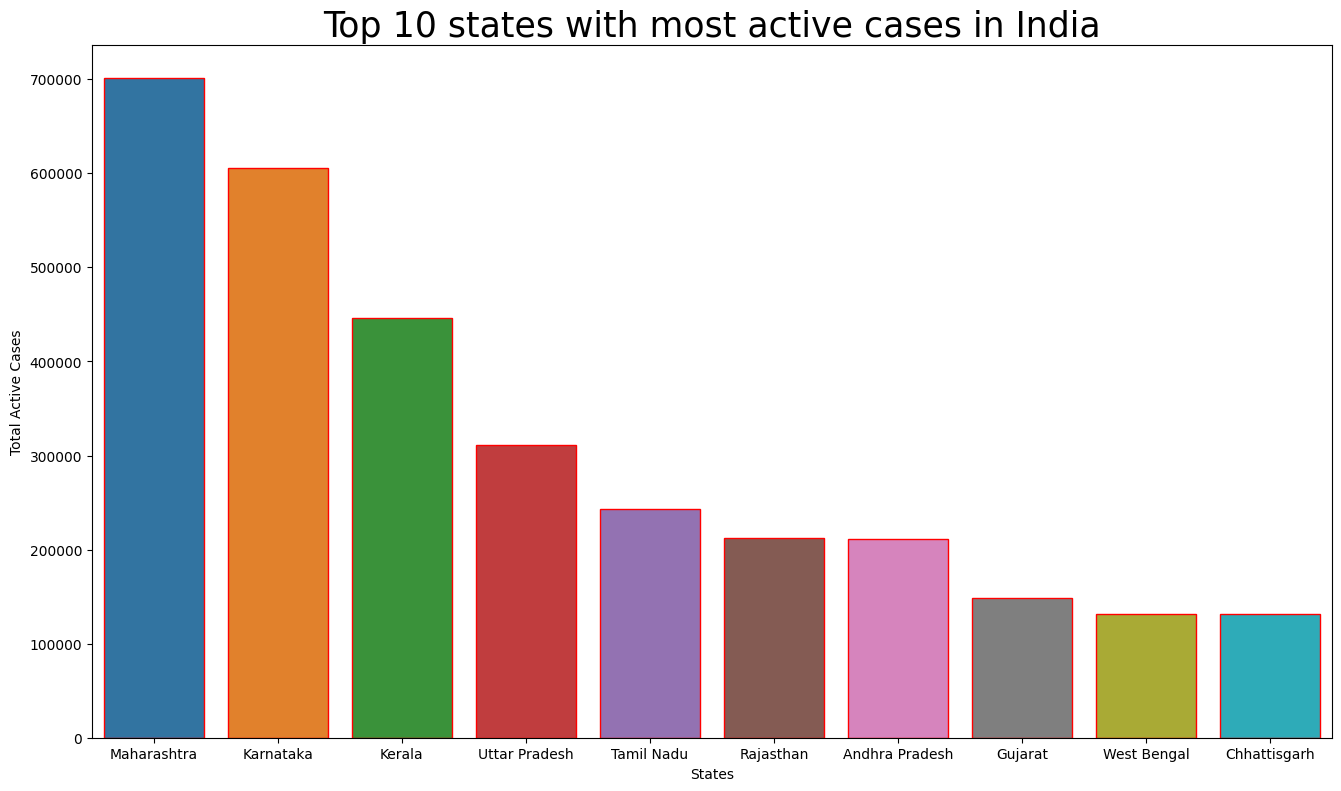

In [16]:
 # top 10 active cases states
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases'], ascending = False).reset_index()
fig = plt.figure(figsize = (16,9))
plt.title('Top 10 states with most active cases in India', size = 25)
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 1, edgecolor = 'red')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

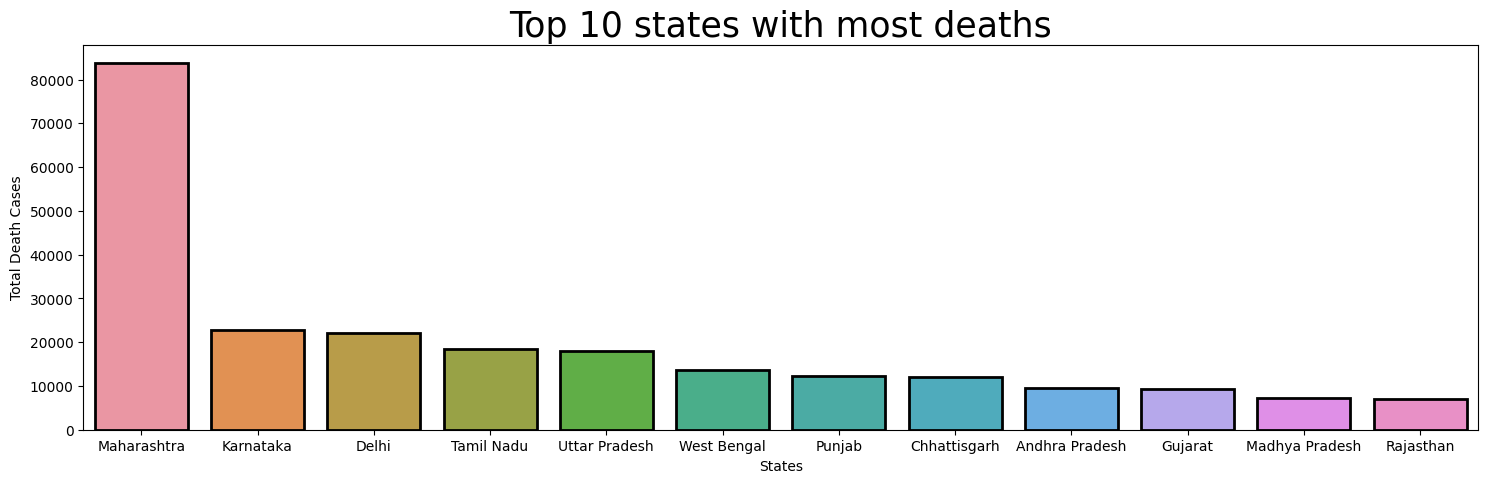

In [17]:
# top states with highest deaths
top_10_deaths = covid_df.groupby(by = "State/UnionTerritory").max()[['Deaths', 'Date']].sort_values(by = 'Deaths', ascending = False).reset_index()

fig = plt.figure(figsize = (18,5))

plt.title('Top 10 states with most deaths', size = 25)

ax = sns.barplot(data = top_10_deaths.iloc[:12], y = "Deaths", x = 'State/UnionTerritory', linewidth = 2, edgecolor = 'black')

plt.xlabel("States")

plt.ylabel("Total Death Cases")

plt.show()


In [ ]:
# growth trend

fig = plt.figure(figsize = (12,6))

ax = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerela', 'Uttar Pradesh', 'Tamil Nadu',]), x = "Date", y = "Active_Cases", hue = "State/UnionTerritory"])

ax.set_title("Top 5 affected states in India", size = 16)

In [ ]:
vaccine_df.head()

In [20]:
vaccine_df.rename(columns = {'Updated On' : 'Vaccine_Date'}, inplace = True)
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [ ]:
vaccine_df.info()

In [19]:
vaccine_df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [23]:
vaccination = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

In [ ]:
vaccination.head()

In [28]:
# male vs female vaccination
male = vaccination["Male(Individuals Vaccinated)"].sum()
female = vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names = ["Male", "Female"], values = [male, female], title = "Male and Female Vaccination")

In [ ]:
# remove rows where state = India
vaccine = vaccine_df[vaccine_df.State!= "India"]
vaccine

In [ ]:
vaccine.rename(columns = {"Total Individuals Vaccinated" : "Total"}, inplace = True)
vaccine.head()

In [ ]:
# states with most number of vaccinated individual

max_vac = vaccine.groupby("State")['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values("Total", ascending = False)[:5]
max_vac

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.title('Top 5 Vaccinated States in India', size = 20)
x = sns.barplot(data = max_vac.iloc[:10], y = max_vac.Total, x = max_vac.index, linewidth = 2, edgecolor = 'black')
plt.xlabel("Staes")
plt.ylabel("Vaccination")
plt.show()

In [ ]:
#least vaccinated states
min_vac = vaccine.groupby("State")['Total'].sum().to_frame('Total')
min_vac = min_vac.sort_values("Total", ascending = True)[:5]
min_vac

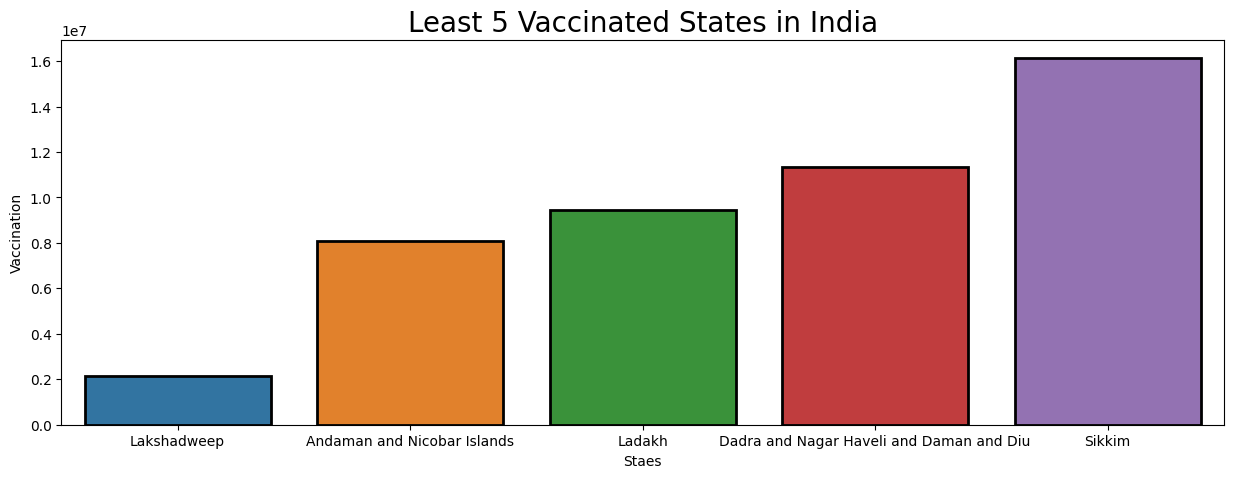

In [46]:
fig = plt.figure(figsize = (15, 5))
plt.title('Least 5 Vaccinated States in India', size = 20)
x = sns.barplot(data = min_vac.iloc[:10], y = min_vac.Total, x = min_vac.index, linewidth = 2, edgecolor = 'black')
plt.xlabel("Staes")
plt.ylabel("Vaccination")
plt.show()